In [12]:
from src.cellular_automata import CellularAutomataSegmentation
import cv2 as cv
import matplotlib.pyplot as plt
from torch import device, cuda

# device = device("cuda:0" if cuda.is_available() else "cpu")
device = "cuda:0" if cuda.is_available() else "cpu"
image = cv.imread("fire.jpg", cv.IMREAD_GRAYSCALE)
process = CellularAutomataSegmentation(image=image, threshold=0.9)
contours = process.run()

image_norm = image / image.max() + 1e-8

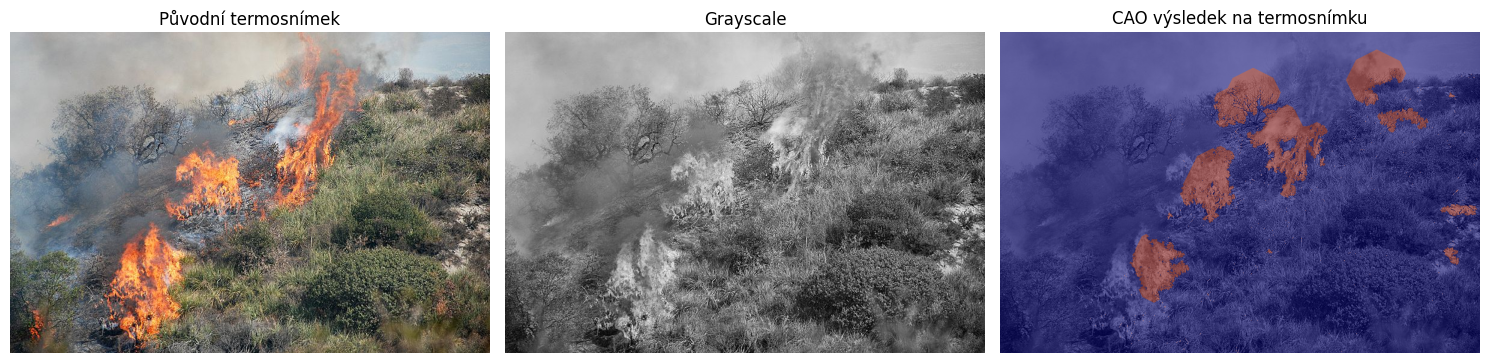

In [17]:
_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax1 = ax[0]
ax1.imshow(cv.cvtColor(cv.imread("fire.jpg"), cv.COLOR_BGR2RGB))
ax1.set_title("Původní termosnímek")
ax1.axis('off')

ax2 = ax[1]
ax2.imshow(image, cmap='gray')
ax2.set_title("Grayscale")
ax2.axis('off')

ax3 = ax[2]
ax3.imshow(image, cmap='gray')
ax3.imshow(contours, cmap='jet', alpha=0.5)  # Overlay s průhledností
ax3.set_title("CAO výsledek na termosnímku")
ax3.axis('off')

plt.tight_layout()
plt.show()

# utils.show_images([image, contours])